# Explore here

It's recommended to use this notebook for exploration purposes.

In [43]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import io


In [44]:
pip install lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(wiki_url, time.sleep(10))


if response:
    soup = BeautifulSoup(response.text, 'html')
    soup

In [46]:
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content

In [47]:
html = io.StringIO(response.text)

tables = pd.read_html(html)
print(f"{len(tables)}) tables were found. ")

27) tables were found. 


In [48]:
html

In [49]:
tables

[                  Rank                 Song                      Artist(s)  \
 0                    1    "Blinding Lights"                     The Weeknd   
 1                    2       "Shape of You"                     Ed Sheeran   
 2                    3  "Someone You Loved"                  Lewis Capaldi   
 3                    4            "Starboy"       The Weeknd and Daft Punk   
 4                    5          "As It Was"                   Harry Styles   
 ..                 ...                  ...                            ...   
 96                  97   "Someone Like You"                          Adele   
 97                  98       "Stay with Me"                      Sam Smith   
 98                  99             "Havana"  Camila Cabello and Young Thug   
 99                 100           "Memories"                       Maroon 5   
 100  As of 22 May 2025    As of 22 May 2025              As of 22 May 2025   
 
     Streams (billions)       Release date        

In [50]:
tables[0]



,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.846,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.367,6 January 2017,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.909,8 November 2018,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.900,21 September 2016,[5]
4,5,"""As It Was""",Harry Styles,3.883,1 April 2022,[6]
...,...,...,...,...,...,...
96,97,"""Someone Like You""",Adele,2.297,24 January 2011,[98]
97,98,"""Stay with Me""",Sam Smith,2.297,14 April 2014,[99]
98,99,"""Havana""",Camila Cabello and Young Thug,2.285,3 August 2017,[100]
99,100,"""Memories""",Maroon 5,2.265,20 September 2019,[101]


In [51]:
print(df)
print(type(df))

NameError: name 'df' is not defined

In [ ]:
df = df.iloc[:-1]
print (df)

NameError: name 'df' is not defined

In [ ]:
df


NameError: name 'df' is not defined

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("wikify.db")
cursor = conn.cursor()

In [ ]:
conn.execute("""CREATE TABLE Music_table (rank INTEGER PRIMARY KEY, song TEXT, artist TEXT, streams REAL, release_date TEXT)""")
conn.commit()

OperationalError: table Music_table already exists

In [ ]:
cursor.execute("SELECT * FROM Music_table LIMIT 5")
print(cursor.fetchall()) 

[]


In [ ]:
conn.commit()
conn.close()

In [67]:
import pandas as pd

# Define data manually
wiki_url = {
    "Rank": [1, 2, 3, 4, 5, 97, 98, 99, 100],
    "Song": [
        "Blinding Lights", "Shape of You", "Someone You Loved", "Starboy",
        "As It Was", "Someone Like You", "Stay with Me", "Havana", "Memories"
    ],
    "Artist(s)": [
        "The Weeknd", "Ed Sheeran", "Lewis Capaldi", "The Weeknd and Daft Punk",
        "Harry Styles", "Adele", "Sam Smith", "Camila Cabello and Young Thug", "Maroon 5"
    ],
    "Streams (billions)": [4.846, 4.367, 3.909, 3.900, 3.883, 2.297, 2.297, 2.285, 2.265],
    "Release date": [
        "29 November 2019", "6 January 2017", "8 November 2018", "21 September 2016",
        "1 April 2022", "24 January 2011", "14 April 2014", "3 August 2017", "20 September 2019"
    ]
}

# Create DataFrame
df = pd.DataFrame(wiki_url)

# Display DataFrame
print(df)


   Rank               Song                      Artist(s)  Streams (billions)  \
0     1    Blinding Lights                     The Weeknd               4.846   
1     2       Shape of You                     Ed Sheeran               4.367   
2     3  Someone You Loved                  Lewis Capaldi               3.909   
3     4            Starboy       The Weeknd and Daft Punk               3.900   
4     5          As It Was                   Harry Styles               3.883   
5    97   Someone Like You                          Adele               2.297   
6    98       Stay with Me                      Sam Smith               2.297   
7    99             Havana  Camila Cabello and Young Thug               2.285   
8   100           Memories                       Maroon 5               2.265   

        Release date  
0   29 November 2019  
1     6 January 2017  
2    8 November 2018  
3  21 September 2016  
4       1 April 2022  
5    24 January 2011  
6      14 April 2014  
7    

/tmp/ipykernel_667/3549470503.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Streams (billions)", y="Song", palette="Blues_r")


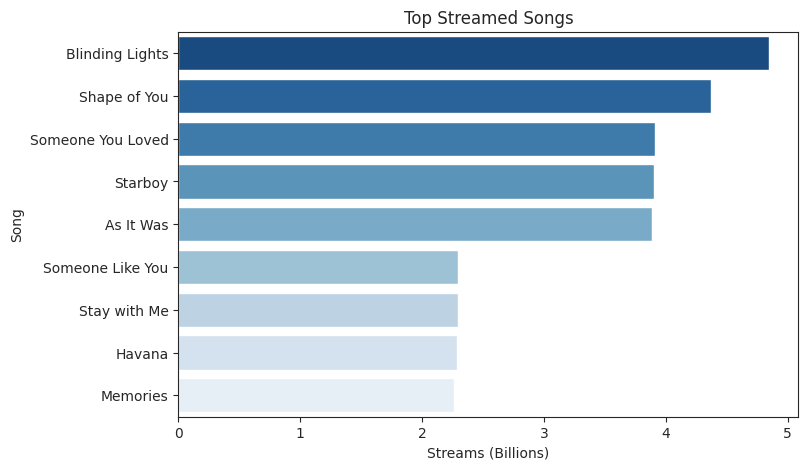

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("ticks")


plt.figure(figsize=(8, 5))


sns.barplot(data=df, x="Streams (billions)", y="Song", palette="Blues_r")


plt.xlabel("Streams (Billions)")
plt.ylabel("Song")
plt.title("Top Streamed Songs")


plt.show()

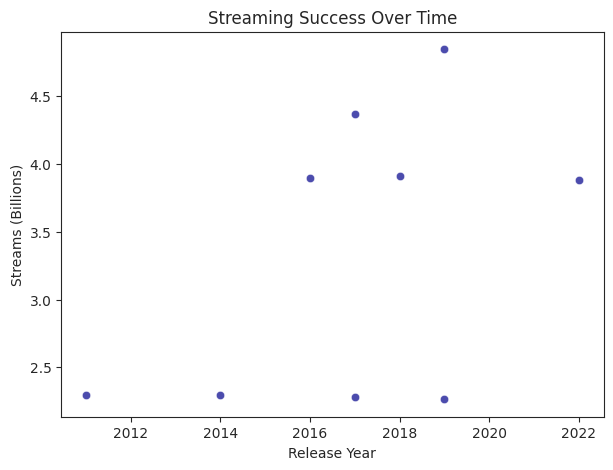

In [ ]:
df["Release Year"] = pd.to_datetime(df["Release date"]).dt.year


plt.figure(figsize=(7, 5))


sns.scatterplot(data=df, x="Release Year", y="Streams (billions)", alpha=0.7, color="darkblue")


plt.xlabel("Release Year")
plt.ylabel("Streams (Billions)")
plt.title("Streaming Success Over Time")


plt.show()